In [1]:
import pandas as pd
import numpy as np
df_athletes = pd.read_csv("Data/athletesMenGames2019.csv",sep=';',na_values = ['--']);
df_athletes.drop(['CountryCode','RegionalName','RegionName','RegionCode','RegionalCode','Rn5k'],axis=1,inplace=True);

In [2]:
df_athletes[df_athletes['Height_cm']<150]

,CompetitorId,CompetitorName,FirstName,LastName,Gender,Age,RegionId,Profession,Height_cm,Weight_kg,...,CleanAndJerk_kg,Snatch_kg,DeadLift_kg,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
28,191624,Alvaro Lopez,Alvaro,Lopez,M,33,0,0,8.54,83.91452,...,151.95332,115.66596,233.59988,NaN,65.0,2:01,1:39,NaN,NaN,NaN
29,270266,Omar Martinez,Omar,Martinez,M,27,0,0,3.54,76.20345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,849478,Shingo Moromasa,Shingo,Moromasa,M,32,0,0,7.54,83.91452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_athletes.loc[df_athletes['CompetitorId']==191624,'Height_cm'] = 170.18;
df_athletes.loc[df_athletes['CompetitorId']==849478,'Height_cm'] = 175;
df_athletes.loc[df_athletes['CompetitorId']==270266,'Height_cm'] = np.nan;
df_athletes['Height_cm'].fillna(df_athletes['Height_cm'].mean(),inplace=True);
df_athletes['BMI']=df_athletes['Weight_kg']/np.square(df_athletes['Height_cm']/100)

In [4]:
feat_drop = ['Gender','RegionId','Profession','AffiliateId','DivisionId','CountryOfOriginCode']
df_strength = df_athletes.drop(feat_drop,axis=1);
df_strength['BMI'].describe()

count    144.000000
mean      30.201946
std        2.695722
min       23.889400
25%       27.804804
50%       31.047142
75%       32.403863
max       34.427823
Name: BMI, dtype: float64

In [24]:
# check that we have only NaN and values with ":" in column 'Fran'
df_strength[df_strength['Fran'].str.contains(r':') & df_strength['Fran'].notnull()]['CompetitorId'].count() + \
df_strength[df_strength['Fran'].isnull()]['CompetitorId'].count() == df_strength['CompetitorId'].count()

True

In [119]:
def min_sec_to_sec(min_sec):
    if (type(min_sec)!=float):
        return int(min_sec.split(':')[0])*60+int(min_sec.split(':')[1])
    return min_sec

def sec_to_min_sec(sec):
    if(~np.isnan(sec)):
        mins = int(sec//60)
        sec = '0'+str(int(sec%60))
        return str(mins) + ':' +sec[-2:]
    return sec

In [120]:
df_strength['Fran_sec'] = df_strength['Fran'].apply(min_sec_to_sec)
df_strength['Grace_sec'] = df_strength['Grace'].apply(min_sec_to_sec)
df_strength['Helen_sec'] = df_strength['Helen'].apply(min_sec_to_sec)
df_strength['Filthy50_sec'] = df_strength['Filthy50'].apply(min_sec_to_sec)
df_strength['Sprint400m_sec'] = df_strength['Sprint400m'].apply(min_sec_to_sec)

In [121]:
def strengthMeanByMovement(df,movement,groupedBy):
    df_movement = df[df[movement].notnull()].reset_index();
    min = int(round(df[groupedBy].min()))
    max = int(round(df[groupedBy].max()))
    df_movement[groupedBy+' range'] = pd.cut(df_movement[groupedBy],range(min-1,max+3,2), include_lowest=True)
    df_movement = df_movement[[groupedBy+' range',movement]]
    df_movement = round(df_movement.groupby(groupedBy+' range').mean())
    return df_movement

In [122]:
df_BackSquat = strengthMeanByMovement(df_strength,'BackSquat_kg','BMI')
df_BackSquat

,BackSquat_kg
BMI range,
"(22.999, 25.0]",166.0
"(25.0, 27.0]",178.0
"(27.0, 29.0]",180.0
"(29.0, 31.0]",196.0
"(31.0, 33.0]",199.0
"(33.0, 35.0]",204.0


In [123]:
df_CleanAndJerk = strengthMeanByMovement(df_strength,'CleanAndJerk_kg','BMI')
df_CleanAndJerk

,CleanAndJerk_kg
BMI range,
"(22.999, 25.0]",116.0
"(25.0, 27.0]",136.0
"(27.0, 29.0]",144.0
"(29.0, 31.0]",142.0
"(31.0, 33.0]",150.0
"(33.0, 35.0]",159.0


In [124]:
df_Snatch = strengthMeanByMovement(df_strength,'Snatch_kg','BMI')
df_Snatch

,Snatch_kg
BMI range,
"(22.999, 25.0]",93.0
"(25.0, 27.0]",114.0
"(27.0, 29.0]",114.0
"(29.0, 31.0]",115.0
"(31.0, 33.0]",122.0
"(33.0, 35.0]",128.0


In [125]:
df_DeadLift = strengthMeanByMovement(df_strength,'DeadLift_kg','BMI')
df_DeadLift

,DeadLift_kg
BMI range,
"(22.999, 25.0]",200.0
"(25.0, 27.0]",210.0
"(27.0, 29.0]",212.0
"(29.0, 31.0]",224.0
"(31.0, 33.0]",233.0
"(33.0, 35.0]",244.0


In [126]:
df_FightGoneBad = strengthMeanByMovement(df_strength,'FightGoneBad','BMI')
df_FightGoneBad['FightGoneBad'].fillna("--", inplace= True)
df_FightGoneBad

,FightGoneBad
BMI range,
"(22.999, 25.0]",--
"(25.0, 27.0]",436
"(27.0, 29.0]",416
"(29.0, 31.0]",392
"(31.0, 33.0]",448
"(33.0, 35.0]",497


In [127]:
df_MaxPullUps = strengthMeanByMovement(df_strength,'MaxPullUps','BMI')
df_MaxPullUps

,MaxPullUps
BMI range,
"(22.999, 25.0]",45.0
"(25.0, 27.0]",52.0
"(27.0, 29.0]",56.0
"(29.0, 31.0]",58.0
"(31.0, 33.0]",63.0
"(33.0, 35.0]",59.0


In [128]:
df_Fran = strengthMeanByMovement(df_strength,'Fran_sec','BMI')
df_Fran['Fran'] = df_Fran['Fran_sec'].apply(sec_to_min_sec)
df_Fran.drop(['Fran_sec'],axis=1,inplace=True)
df_Fran

,Fran
BMI range,
"(22.999, 25.0]",2:30
"(25.0, 27.0]",2:33
"(27.0, 29.0]",2:34
"(29.0, 31.0]",2:34
"(31.0, 33.0]",2:17
"(33.0, 35.0]",2:10


In [129]:
df_Grace = strengthMeanByMovement(df_strength,'Grace_sec','BMI')
df_Grace['Grace'] = df_Grace['Grace_sec'].apply(sec_to_min_sec)
df_Grace.drop(['Grace_sec'],axis=1,inplace=True)
df_Grace

,Grace
BMI range,
"(22.999, 25.0]",1:52
"(25.0, 27.0]",2:08
"(27.0, 29.0]",2:04
"(29.0, 31.0]",1:56
"(31.0, 33.0]",1:35
"(33.0, 35.0]",1:18


In [130]:
df_Helen = strengthMeanByMovement(df_strength,'Helen_sec','BMI')
df_Helen['Helen'] = df_Helen['Helen_sec'].apply(sec_to_min_sec)
df_Helen.drop(['Helen_sec'],axis=1,inplace=True)
df_Helen.fillna("--", inplace= True)
df_Helen

,Helen
BMI range,
"(22.999, 25.0]",--
"(25.0, 27.0]",11:02
"(27.0, 29.0]",7:34
"(29.0, 31.0]",7:48
"(31.0, 33.0]",7:26
"(33.0, 35.0]",7:23


In [131]:
df_Filthy50 = strengthMeanByMovement(df_strength,'Filthy50_sec','BMI')
df_Filthy50['Filthy50'] = df_Filthy50['Filthy50_sec'].apply(sec_to_min_sec)
df_Filthy50.drop(['Filthy50_sec'],axis=1,inplace=True)
df_Filthy50.fillna("--", inplace= True)
df_Filthy50

,Filthy50
BMI range,
"(22.999, 25.0]",--
"(25.0, 27.0]",23:30
"(27.0, 29.0]",17:23
"(29.0, 31.0]",17:46
"(31.0, 33.0]",17:41
"(33.0, 35.0]",14:56


In [132]:
df_Sprint400m = strengthMeanByMovement(df_strength,'Sprint400m_sec','BMI')
df_Sprint400m['Sprint400m'] = df_Sprint400m['Sprint400m_sec'].apply(sec_to_min_sec)
df_Sprint400m.drop(['Sprint400m_sec'],axis=1,inplace=True)
df_Sprint400m.fillna("--", inplace= True)
df_Sprint400m

,Sprint400m
BMI range,
"(22.999, 25.0]",--
"(25.0, 27.0]",1:04
"(27.0, 29.0]",1:06
"(29.0, 31.0]",0:59
"(31.0, 33.0]",0:59
"(33.0, 35.0]",1:04


In [110]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

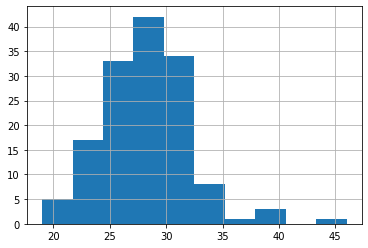

In [179]:
df_athletes['Age'].hist();

In [133]:
print('Men athletes in CrossFit Games 2019:')
print('Mean values for strength marks selected by BMI range')
df_meanByStrength = pd.concat([df_BackSquat, df_CleanAndJerk,df_Snatch,df_DeadLift],axis=1)
df_meanByStrength

Men athletes in CrossFit Games 2019:
Mean values for strength marks selected by BMI range


,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
BMI range,,,,
"(22.999, 25.0]",166.0,116.0,93.0,200.0
"(25.0, 27.0]",178.0,136.0,114.0,210.0
"(27.0, 29.0]",180.0,144.0,114.0,212.0
"(29.0, 31.0]",196.0,142.0,115.0,224.0
"(31.0, 33.0]",199.0,150.0,122.0,233.0
"(33.0, 35.0]",204.0,159.0,128.0,244.0


In [134]:
print('Mean values for benchmarks wod-s selected by BMI range')
df_meanByBenchMark = pd.concat([df_FightGoneBad, df_MaxPullUps,df_Fran,df_Grace, df_Helen, df_Filthy50, df_Sprint400m],axis=1)
df_meanByBenchMark

Mean values for benchmarks wod-s selected by BMI range


,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
BMI range,,,,,,,
"(22.999, 25.0]",--,45.0,2:30,1:52,--,--,--
"(25.0, 27.0]",436,52.0,2:33,2:08,11:02,23:30,1:04
"(27.0, 29.0]",416,56.0,2:34,2:04,7:34,17:23,1:06
"(29.0, 31.0]",392,58.0,2:34,1:56,7:48,17:46,0:59
"(31.0, 33.0]",448,63.0,2:17,1:35,7:26,17:41,0:59
"(33.0, 35.0]",497,59.0,2:10,1:18,7:23,14:56,1:04
